Gaussian filtering. Show the result using σ = 1,2,4,8 pixels and explain
in detail what can be seen.

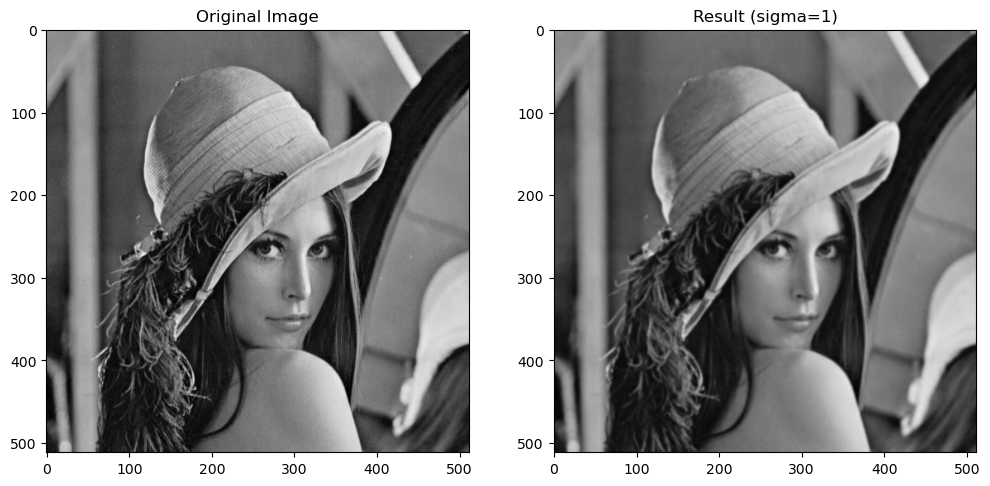

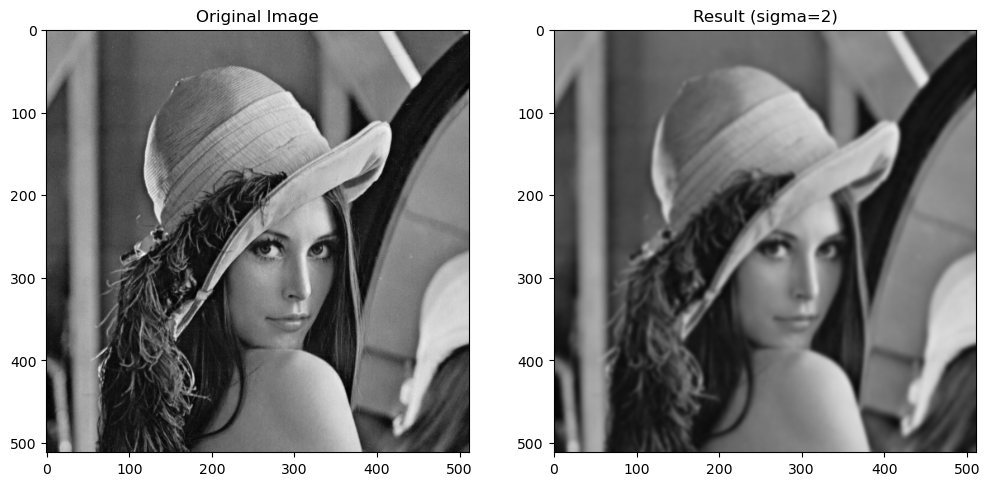

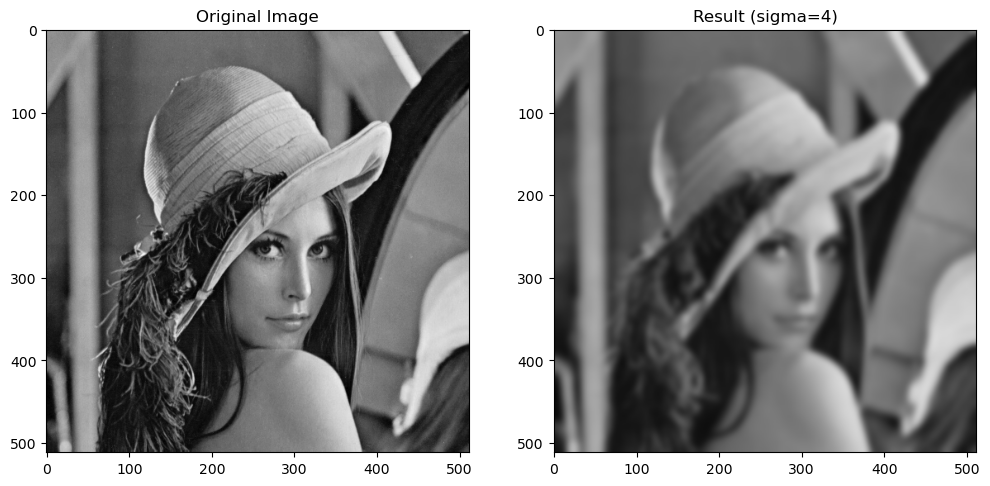

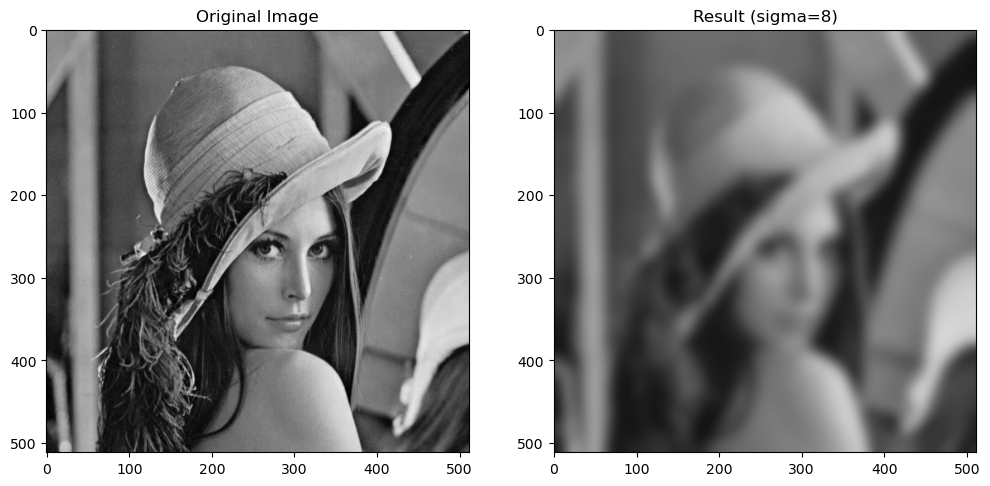

In [19]:
#we import the necessary libraries for the specific exercise
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2
#read the image
image = cv2.imread('lenna.jpg')
#define the sigma values 
sigmas = [1, 2, 4, 8]
#iterate through the values
for sigma in sigmas:
    #apply the function for the filter with the sigma value
    result = ndimage.gaussian_filter(image, sigma)
    #plot the result along with the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.title(f'Result (sigma={sigma})')

    plt.show()

Explanation: In this images we can see how the gaussian filter alters the original image, the bigger the sigma, the bigger the distortion.

Gradient magnitude computation using Gaussian derivatives. Use σ =
1,2,4,8 pixels, and explain in detail what can be seen and how the results
differ.

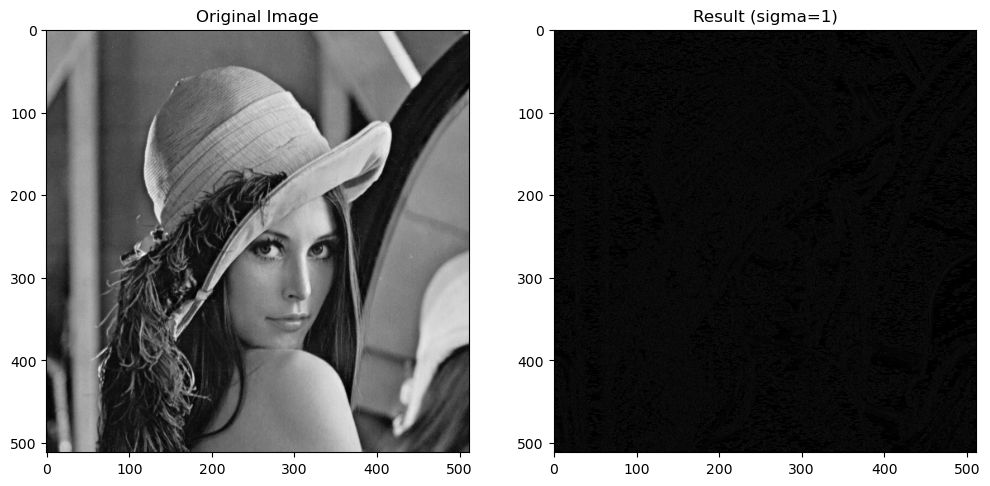

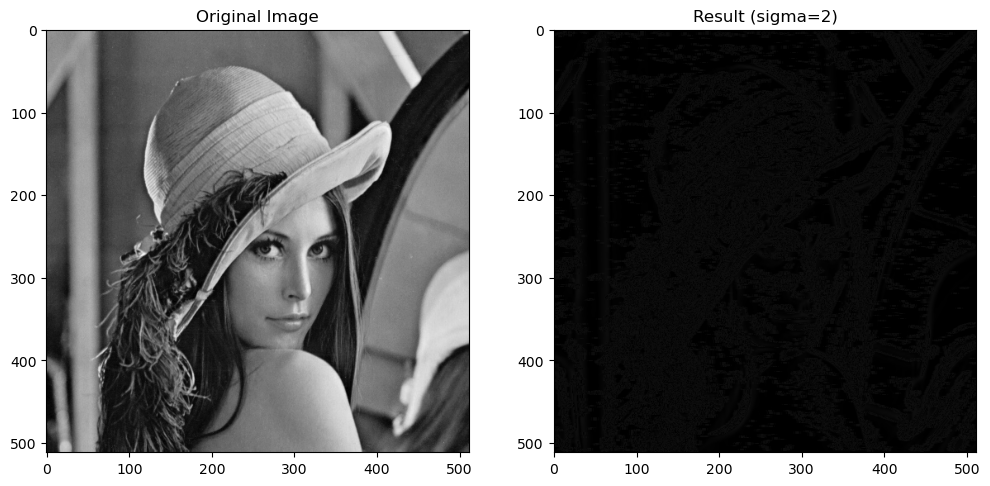

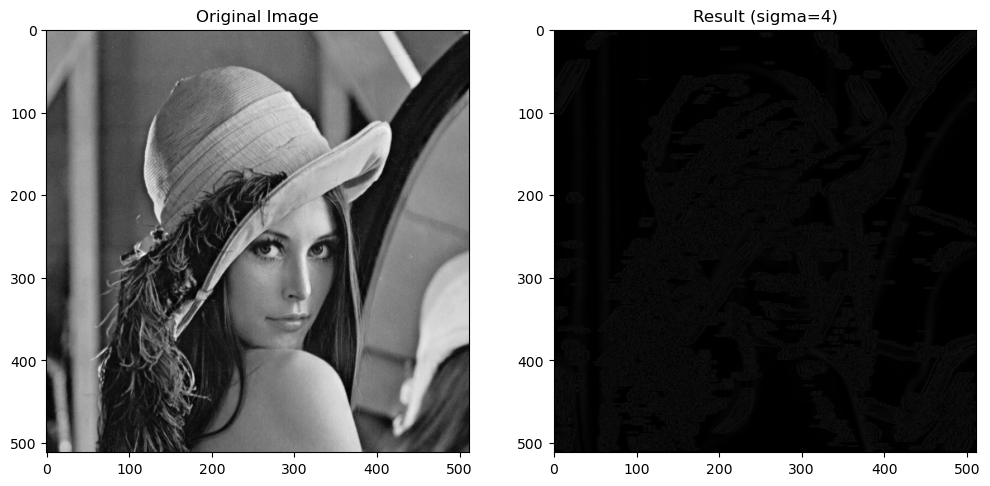

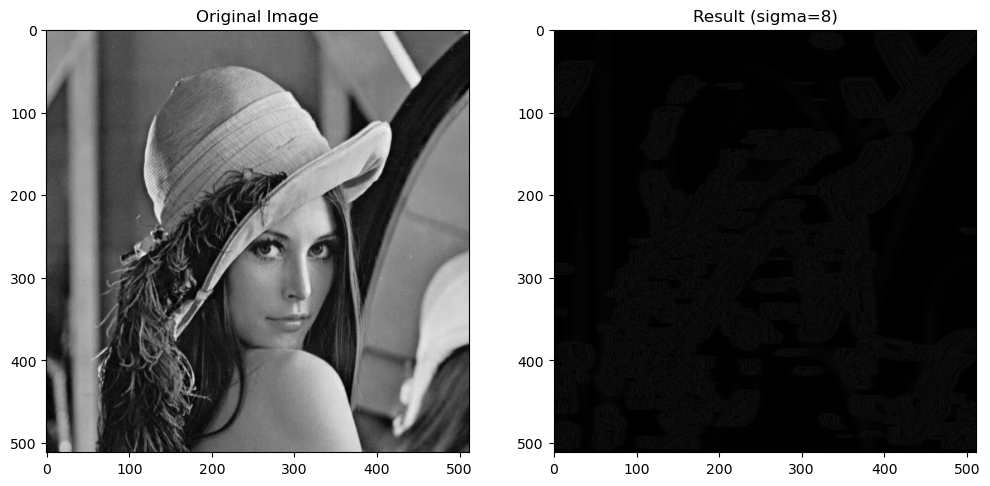

In [20]:
#we import the necessary libraries for the specific exercise
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2
#read the image
image = cv2.imread('lenna.jpg')
#define the sigma values 
sigmas = [1, 2, 4, 8]
#iterate through the values
for sigma in sigmas:
    #apply the function for the gradient with the sigma value
    result = ndimage.gaussian_gradient_magnitude(image, sigma)
    #plot the result along with the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.title(f'Result (sigma={sigma})')

    plt.show()